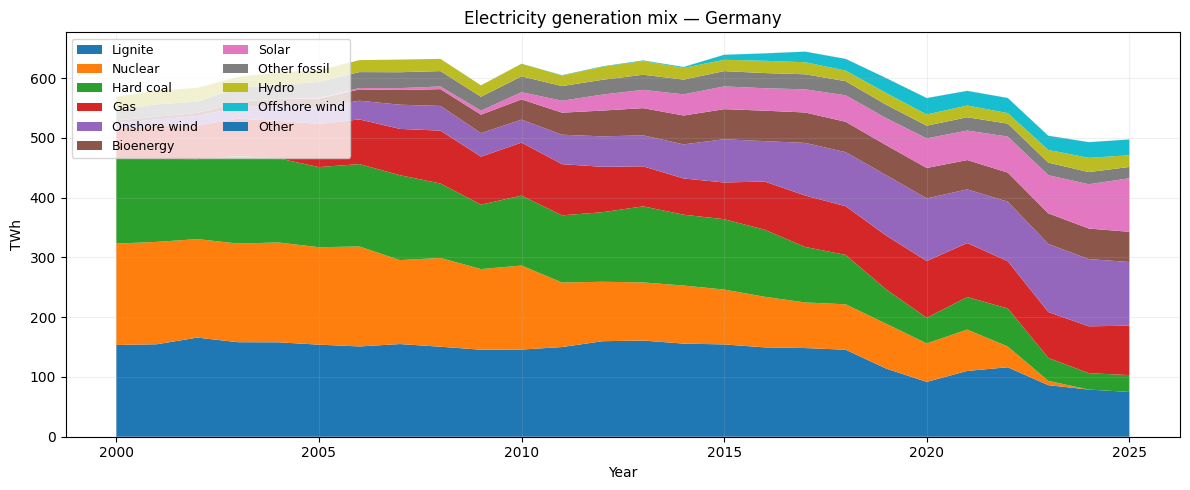

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

PATH = "europe_yearly_full_release_long_format.csv"
COUNTRY = "Germany"   # <- change country
YEAR_MIN = 2000

df = pd.read_csv(PATH)

g = df[
    (df["Area"] == COUNTRY) &
    (df["Year"] >= YEAR_MIN) &
    (df["Category"] == "Electricity generation") &
    (df["Subcategory"] == "Fuel") &
    (df["Unit"] == "TWh")
][["Year", "Variable", "Value"]].copy()

g["Value"] = pd.to_numeric(g["Value"], errors="coerce")
g = g.dropna()

mix = (g.pivot_table(index="Year", columns="Variable", values="Value", aggfunc="sum")
         .fillna(0)
         .sort_index())

# keep big contributors, group the rest
top = mix.mean().sort_values(ascending=False)
keep = top.head(10).index
mix_plot = mix[keep].copy()
rest = mix.drop(columns=keep).sum(axis=1)
if rest.max() > 0:
    mix_plot["Other"] = rest

plt.figure(figsize=(12,5))
plt.stackplot(mix_plot.index, mix_plot.T.values, labels=mix_plot.columns)
plt.title(f"Electricity generation mix — {COUNTRY}")
plt.xlabel("Year")
plt.ylabel("TWh")
plt.grid(True, alpha=0.2)
plt.legend(ncol=2, fontsize=9, loc="upper left")
plt.tight_layout()
plt.show()

**Germany power-sector pathway anchors (use with the uploaded Ember long-format CSV as the historical baseline)**

**Executive summary**
Germany’s policy trajectory implies (i) rapid renewable expansion, (ii) coal phase-out no later than 2038, and (iii) economy-wide greenhouse-gas neutrality by 2045 (with an aspiration for net-negative emissions after 2050). These official anchors support pathway assumptions of near-zero coal by the mid-2030s, no nuclear generation after April 2023, strongly rising electricity demand from electrification/sector coupling, and very low grid CO₂ intensity by 2050. Use the uploaded Ember long-format CSV for the “starting point” (historical mix, demand, net imports, and CO₂ intensity), and constrain the forward path with the official targets and scenario ranges below.

**Horizon: 2035 (mid-2030s)**
Germany’s draft updated NECP states an intent to make the electricity system “largely climate neutral by 2035” and sets high renewable capacity expansion paths continuing from the 2030 milestone of 80% renewables in gross electricity consumption. Offshore wind has an explicit statutory target of at least 40 GW by 2035, while other renewables are guided by trajectories to 2040 (PV 400 GW; onshore wind 160 GW). A practical demand anchor for the mid-2030s is given by the German TSOs’ Grid Development Plan scenario framework: gross power consumption is projected around ~899–1,053 TWh by 2037, implying that a ~850–1,000 TWh range by 2035 is a defensible modeling bound (definition caveat: GDP uses “gross power consumption”, your Ember file may use “demand” and “net imports”, so align metrics before calibrating growth rates).

**Model defaults to use for 2035 (conservative, to keep the model realistic)**
- **Demand (gross)**: 900 TWh (range 850–1,000 TWh), anchored to GDP 2037 gross power consumption 899–1,053 TWh.  
- **Renewables capacity (order-of-magnitude)**: offshore wind ≥40 GW by 2035 (explicit target); onshore wind ~150–160 GW and PV ~300–350 GW by the mid-2030s (interpolate between NECP 2030 and 2040 targets; cross-check against GDP 2037 capacity levels).  
- **CO₂ intensity target (modeled)**: 50 gCO₂e/kWh by 2035 as a conservative default consistent with “largely climate neutral” and coal nearly phased out (note: no official nation-wide “gCO₂e/kWh” target is published for 2035; this is a modeling proxy).

**Horizon: 2050 (long-run end state)**
Germany’s Climate Change Act framework targets greenhouse-gas neutrality by 2045 and states an aim for a net-negative emissions balance from 2050 onward. This implies the electricity sector should be effectively net-zero well before 2050, with any remaining dispatchable thermal capacity either decarbonized (e.g., hydrogen) or balanced by removals/negative emissions. The Grid Development Plan scenario framework indicates gross power consumption of ~1,079–1,303 TWh by 2045 and renewables capacity ~638–703 GW by 2045 (PV ~400–445 GW, onshore wind ~160–180 GW, offshore wind ~70 GW), which provides a strong “scale check” for 2050 assumptions even if 2050 is not the GDP target year. Coal should be absent (legal phase-out by 2038), and nuclear is already out (continued operation was only allowed until 15 April 2023).

**Model defaults to use for 2050 (conservative, internally consistent)**
- **Demand (gross)**: 1,200 TWh (range 1,100–1,300 TWh), anchored to GDP 2045 gross power consumption 1,079–1,303 TWh.  
- **Renewables capacity (scale check)**: keep at least the GDP-2045 scale in 2050: PV 400–445 GW, onshore wind 160–180 GW, offshore wind 70 GW (and total renewables 638–703 GW by 2045).  
- **CO₂ intensity target (modeled)**: 5 gCO₂e/kWh in 2050 (range 0–10 gCO₂e/kWh) to reflect net-zero logic and residual balancing needs.

**Key numeric targets and scenario anchors (official / planning documents)**
| Metric | Value | Relevant year | Primary source URL | Where to cite (exact location) |
|---|---:|---:|---|---|
| Renewables share in gross electricity consumption | 80% | 2030 | https://commission.europa.eu/system/files/2023-11/GERMANY-%20DRAFT%20UPDATED%20NECP%202021-2030%20EN.pdf | NECP draft updated, p.15 (“By 2030, 80% of gross electricity consumption…”) |
| PV installed capacity target | 215 GW → 400 GW | 2030 → 2040 | https://commission.europa.eu/system/files/2023-11/GERMANY-%20DRAFT%20UPDATED%20NECP%202021-2030%20EN.pdf | NECP draft updated, p.16 (“Photovoltaics: 215 GW to 2030 … 400 GW by 2040”) |
| Onshore wind installed capacity target | 115 GW → 160 GW | 2030 → 2040 | https://commission.europa.eu/system/files/2023-11/GERMANY-%20DRAFT%20UPDATED%20NECP%202021-2030%20EN.pdf | NECP draft updated, p.16 (“Onshore wind: 115 GW to 2030 … 160 GW by 2040”) |
| Offshore wind installed capacity target | ≥30 GW → ≥40 GW → ≥70 GW | 2030 / 2035 / 2045 | https://commission.europa.eu/system/files/2023-11/GERMANY-%20DRAFT%20UPDATED%20NECP%202021-2030%20EN.pdf | NECP draft updated, p.16 (“Wind at sea: … 40 GW by 2035 and 70 GW by 2045”) |
| Electricity system ambition | “largely climate neutral” | 2035 | https://commission.europa.eu/system/files/2023-11/GERMANY-%20DRAFT%20UPDATED%20NECP%202021-2030%20EN.pdf | NECP draft updated, p.146 (text: “largely climate neutral by 2035”) |
| Coal power phase-out | complete phase-out (latest) | 2038 | https://www.bundesregierung.de/breg-en/service/archive/kohleausstiegsgesetz-1717014 | German Federal Government FAQ (“close down no later than 2038”) |
| Last nuclear plants allowed to operate until | 15 April 2023 | 2023 | https://www.bundesumweltministerium.de/en/topics/nuclear-safety/overview-nuclear-safety/amendments-to-the-atomic-energy-act | BMUV page (“… continued operation … until 15 April 2023”) |
| National climate target | GHG neutrality; net-negative thereafter | 2045; post-2050 | https://www.bundesregierung.de/breg-en/service/archive/climate-change-act-2021-1936846 | Climate Change Act explainer (“… neutrality by 2045 … negative emissions from 2050 onward”) |
| Gross power consumption (scenario range) | 899–1,053 TWh | 2037 | https://www.netzentwicklungsplan.de/sites/default/files/2023-06/EN_GDP%20compact_2037_2045_V2023_2E_0.pdf | GDP compact, p.2 (“… 899 to 1,053 TWh in 2037 …”) |
| Gross power consumption (scenario range) + renewables scale | 1,079–1,303 TWh; renewables 638–703 GW | 2045 | https://www.netzentwicklungsplan.de/sites/default/files/2023-06/EN_GDP%20compact_2037_2045_V2023_2E_0.pdf | GDP compact, p.2 table (“… 1,079 to 1,303 TWh … renewables 638–703 GW …”) |

**Caveats and conservative modeling practices**
1) “CO₂ intensity” definitions differ (direct vs lifecycle; production vs consumption; gross vs net generation). Keep your model consistent with the definition in the uploaded Ember long-format CSV and avoid mixing in external intensity series without reconciling definitions.  
2) Several targets are minimums or political intents (“largely climate neutral by 2035”), not a single binding numeric KPI in gCO₂e/kWh. Use conservative proxy targets (e.g., 50 gCO₂e/kWh by 2035; 0–10 gCO₂e/kWh by 2050) and report sensitivity ranges.  
3) Demand is the largest driver of “required build-out.” The GDP scenario ranges imply a wide envelope; choose a central case (e.g., 900 TWh mid-2030s; 1,200 TWh by 2050) and stress test against the low/high bounds.


In [11]:
import numpy as np
from IPython.display import display

P="europe_yearly_full_release_long_format.csv"  # set your upload path
C="Germany"
D35,D50=900,1200
I35,I50=50,5
Wcap,Scap=10,22
CFw,CFs=.30,.14
coal_end=2038

df=pd.read_csv(P); df=df[df.Area==C]
y0=int(df.query("Category=='Electricity generation' & Subcategory=='Fuel' & Unit=='TWh'")["Year"].max())

g=(df.query("Year==@y0 & Category=='Electricity generation' & Subcategory=='Fuel' & Unit=='TWh'")
     .assign(Value=lambda x: pd.to_numeric(x.Value,errors="coerce"))
     .groupby("Variable")["Value"].sum())

coal=float(g.get("Hard coal",0)+g.get("Lignite",0))
gas =float(g.get("Gas",0)+g.get("Other fossil",0))
wind=float(g.get("Onshore wind",0)+g.get("Offshore wind",0))
solar=float(g.get("Solar",0))
tot=float(g.sum())
other=float(tot-(coal+gas+wind+solar))

dem0=float(df.query("Year==@y0 & Category=='Electricity demand' & Subcategory=='Demand' & Variable=='Demand' & Unit=='TWh'")["Value"].sum())
imp0=float(df.query("Year==@y0 & Category=='Electricity imports' & Variable=='Net imports' & Unit=='TWh'")["Value"].sum())
i0  =float(df.query("Year==@y0 & Category=='Power sector emissions' & Subcategory=='CO2 intensity' & Variable=='CO2 intensity'")["Value"].iloc[0])
dom0=dem0-imp0

efc,efg=0.95,0.40
s=(i0*0.001*dom0)/(coal*efc+gas*efg)   # calibrate to baseline intensity
efc*=s; efg*=s

w_twh=8760*CFw/1000; s_twh=8760*CFs/1000
wGW,sGW=wind/w_twh, solar/s_twh

yrs=np.arange(y0,2051); out=[]
for y in yrs:
    dem = dem0 + (D35-dem0)*(y-y0)/(2035-y0) if y<=2035 else D35 + (D50-D35)*(y-2035)/(2050-2035)
    dom = dem-imp0
    coal_y = 0.0 if y>=coal_end else coal*(coal_end-y)/(coal_end-y0)
    tgt = i0 + (I35-i0)*(y-y0)/(2035-y0) if y<=2035 else I35 + (I50-I35)*(y-2035)/(2050-2035)

    wind_y,solar_y = wGW*w_twh, sGW*s_twh
    gas_need=max(0.0, dom-(other+coal_y+wind_y+solar_y))

    gas_max=(tgt*0.001*dom - coal_y*efc)/efg
    infeas=gas_max<0; gas_max=max(0.0, gas_max)

    add=max(0.0, gas_need-gas_max)
    if y>y0 and add>0:
        dW=min(Wcap, add/w_twh); add-=dW*w_twh
        dS=min(Scap, add/s_twh); add-=dS*s_twh
        wGW+=dW; sGW+=dS

    wind_y,solar_y = wGW*w_twh, sGW*s_twh
    gas_y=max(0.0, dom-(other+coal_y+wind_y+solar_y))
    infeas=infeas or (gas_y>gas_max+1e-6)

    E=coal_y*efc + gas_y*efg
    I=E/dom/0.001
    out.append([y,dem,coal_y,gas_y,wind_y,solar_y,other,E,I,tgt,wGW,sGW,infeas])

res=pd.DataFrame(out,columns=[
 "Year","Demand_TWh","Coal_TWh","Gas_TWh","Wind_TWh","Solar_TWh","OtherClean_TWh",
 "Emissions_MtCO2e","Intensity_g_per_kWh","Target_g_per_kWh","Wind_GW","Solar_GW","Infeasible"
])

print(f"Baseline year={y0} | Ember CO2 intensity={i0:.1f} g/kWh | calibrated EF coal/gas={efc:.3f}/{efg:.3f} Mt/TWh")
display(g.sort_values(ascending=False).to_frame("TWh"))
display(res)
display(res[res.Year.isin([2035,2050])][["Year","Demand_TWh","Emissions_MtCO2e","Intensity_g_per_kWh","Target_g_per_kWh","Wind_GW","Solar_GW","Infeasible"]])


Baseline year=2025 | Ember CO2 intensity=331.6 g/kWh | calibrated EF coal/gas=1.130/0.476 Mt/TWh


,TWh
Variable,
Onshore wind,106.54
Solar,89.62
Gas,82.67
Lignite,74.94
Bioenergy,50.53
Hard coal,28.21
Offshore wind,26.46
Hydro,19.56
Other fossil,18.91


,Year,Demand_TWh,Coal_TWh,Gas_TWh,Wind_TWh,Solar_TWh,OtherClean_TWh,Emissions_MtCO2e,Intensity_g_per_kWh,Target_g_per_kWh,Wind_GW,Solar_GW,Infeasible
0,2025,517.240,103.150000,101.580000,133.000000,89.620000,70.09,164.951104,331.600000,331.60,50.608828,73.075669,False
1,2026,555.516,95.215385,115.396107,159.280000,95.734509,70.09,162.557663,303.440000,303.44,60.608828,78.061406,False
2,2027,593.792,87.280769,124.683092,185.560000,106.378138,70.09,158.008518,275.280000,275.28,70.608828,86.740165,False
3,2028,632.068,79.346154,129.440956,211.840000,121.550890,70.09,151.303668,247.120000,247.12,80.608828,99.111945,False
4,2029,670.344,71.411538,129.669699,238.120000,141.252763,70.09,142.443114,218.960000,218.96,90.608828,115.176747,False
5,2030,708.620,63.476923,125.369320,264.400000,165.483757,70.09,131.426856,190.800000,190.80,100.608828,134.934570,False
6,2031,746.896,55.542308,118.319135,290.680000,192.464557,70.09,119.101786,163.804760,162.64,110.608828,156.934570,True
7,2032,785.172,47.607692,111.268951,316.960000,219.445357,70.09,106.776716,139.509566,134.48,120.608828,178.934570,True
8,2033,823.448,39.673077,104.218766,343.240000,246.426157,70.09,94.451646,117.528626,106.32,130.608828,200.934570,True
9,2034,861.724,31.738462,97.168581,369.520000,273.406957,70.09,82.126576,97.546305,78.16,140.608828,222.934570,True


,Year,Demand_TWh,Emissions_MtCO2e,Intensity_g_per_kWh,Target_g_per_kWh,Wind_GW,Solar_GW,Infeasible
10,2035,900.0,69.801505,79.301869,50.0,150.608828,244.934570,True
25,2050,1200.0,5.901000,5.000000,5.0,292.367159,268.567466,False


 year  demand_TWh  pv_GW  wind_on_GW  wind_off_GW  coal_TWh  gas_TWh  other_clean_TWh  curtail_TWh  emissions_Mt  intensity_gkWh  target_gkWh  capex_bn  capex_cum_bn  meets_target
 2025      497.00  73.10       50.60         0.00    103.15   101.13            70.09         0.00        138.45          278.56       332.00      0.00          0.00          True
 2030      900.00 215.00      115.00        30.00     63.48    82.28            70.09         0.00         93.21          103.57       120.00     51.61        258.05          True
 2035      900.00 250.00      140.00        40.00     23.80     0.00            70.09        26.09         22.61           25.13        60.00     16.40        340.05          True
 2045    1,200.00 420.00      170.00        70.00      0.00     0.00            70.09       107.88          0.00            0.00        15.00     23.30        573.05          True
 2050    1,200.00 450.00      180.00        70.00      0.00     0.00            70.09       170.95  

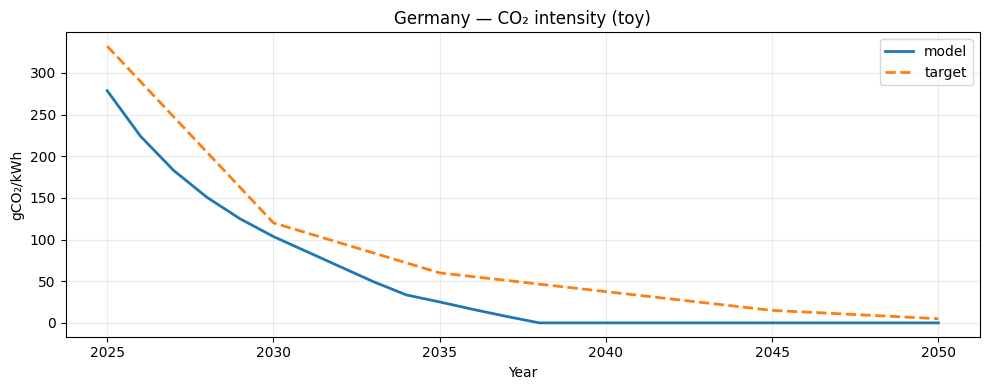

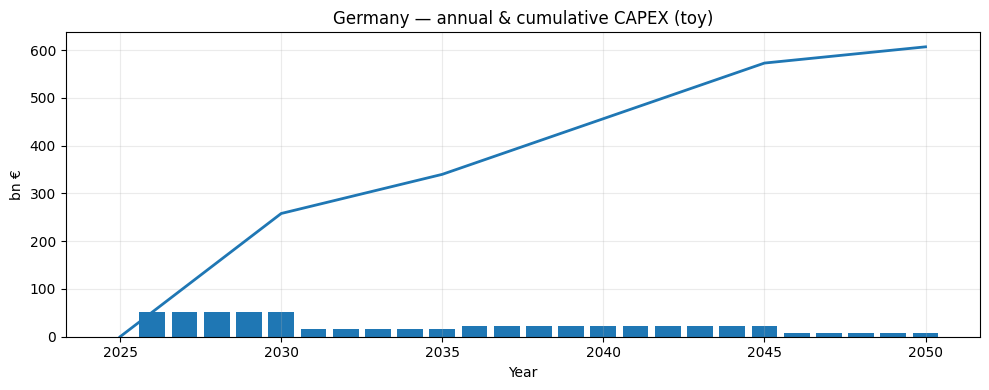

In [14]:
PATH = "europe_yearly_full_release_long_format.csv"
C = "Germany"

plan = pd.DataFrame({
    "year":      [2025, 2030, 2035, 2045, 2050],
    "demand_TWh":[497,  900,  900,  1200, 1200],
    "pv_GW":     [73.1, 215,  250,  420,  450],
    "wind_on_GW":[50.6, 115,  140,  170,  180],
    "wind_off_GW":[0.0, 30,   40,   70,   70],
    "target_gkWh":[332, 120,  60,   15,   5],   # edit if you want
}).sort_values("year")

CF = {"pv":0.14, "wind_on":0.30, "wind_off":0.45}
EF = {"coal":0.95, "gas":0.40}  # Mt/TWh (toy)
CAPEX = {"pv":700, "wind_on":1300, "wind_off":2500}  # €/kW (toy)
H = 8760
coal_end = 2038

df = pd.read_csv(PATH)
g = df[(df.Area==C)&(df.Category=="Electricity generation")&(df.Subcategory=="Fuel")&(df.Unit=="TWh")].copy()
g["Value"] = pd.to_numeric(g["Value"], errors="coerce")
g = g.dropna(subset=["Value"])
y0 = int(g.Year.max())
m0 = g[g.Year==y0].groupby("Variable")["Value"].sum()

coal0 = float(m0.get("Hard coal",0)+m0.get("Lignite",0)+m0.get("Coal",0))
other_clean0 = float(m0.get("Nuclear",0)+m0.get("Hydro",0)+m0.get("Bioenergy",0)+m0.get("Other renewables",0))

yrs = np.arange(int(plan.year.min()), int(plan.year.max())+1)

p = (plan.set_index("year")
       .reindex(yrs)
       .interpolate()
       .ffill()
       .reset_index()
       .rename(columns={"index":"year"}))

p["coal_TWh"] = np.where(p.year>=coal_end, 0.0, coal0*np.clip((coal_end-p.year)/(coal_end-y0), 0, 1))
p["other_clean_TWh"] = other_clean0

p["pv_TWh"] = p.pv_GW*H*CF["pv"]/1000
p["wind_on_TWh"] = p.wind_on_GW*H*CF["wind_on"]/1000
p["wind_off_TWh"] = p.wind_off_GW*H*CF["wind_off"]/1000
p["vre_TWh"] = p[["pv_TWh","wind_on_TWh","wind_off_TWh"]].sum(axis=1)

p["used_vre_TWh"] = np.minimum(p.vre_TWh, np.maximum(0.0, p.demand_TWh - (p.other_clean_TWh + p.coal_TWh)))
p["curtail_TWh"] = p.vre_TWh - p.used_vre_TWh

p["gas_TWh"] = np.maximum(0.0, p.demand_TWh - (p.other_clean_TWh + p.coal_TWh + p.used_vre_TWh))

p["emissions_Mt"] = p.coal_TWh*EF["coal"] + p.gas_TWh*EF["gas"]
p["intensity_gkWh"] = (p.emissions_Mt/p.demand_TWh)/0.001

for k in ["pv","wind_on","wind_off"]:
    p[f"add_{k}_GW"] = p[f"{k}_GW"].diff().fillna(0).clip(lower=0)
    p[f"capex_{k}_bn"] = p[f"add_{k}_GW"]*1e6*CAPEX[k]/1e9
p["capex_bn"] = p[[c for c in p.columns if c.startswith("capex_")]].sum(axis=1)
p["capex_cum_bn"] = p.capex_bn.cumsum()

anchors = p[p.year.isin(plan.year)][["year","demand_TWh","pv_GW","wind_on_GW","wind_off_GW",
                                     "coal_TWh","gas_TWh","other_clean_TWh",
                                     "curtail_TWh","emissions_Mt","intensity_gkWh","target_gkWh",
                                     "capex_bn","capex_cum_bn"]].copy()
anchors["meets_target"] = anchors.intensity_gkWh <= anchors.target_gkWh

print(anchors.to_string(index=False, float_format=lambda x: f"{x:,.2f}"))

fig, ax = plt.subplots(figsize=(10,4))
ax.plot(p.year, p.intensity_gkWh, lw=2, label="model")
ax.plot(p.year, p.target_gkWh, lw=2, ls="--", label="target")
ax.set(title=f"{C} — CO₂ intensity (toy)", xlabel="Year", ylabel="gCO₂/kWh")
ax.grid(alpha=.25); ax.legend(); plt.tight_layout(); plt.show()

fig, ax = plt.subplots(figsize=(10,4))
ax.bar(p.year, p.capex_bn)
ax.plot(p.year, p.capex_cum_bn, lw=2)
ax.set(title=f"{C} — annual & cumulative CAPEX (toy)", xlabel="Year", ylabel="bn €")
ax.grid(alpha=.25); plt.tight_layout(); plt.show()

### Limitations

This is a deliberately simplified “policy-to-outcome” check. It assumes the capacity targets are fully delivered and fully usable (fixed capacity factors, no grid bottlenecks), so it can overstate clean generation in high-penetration years. “Other clean” output (hydro/biomass/etc.) is held constant, and coal is phased out on a smooth linear path rather than the real stepwise closure schedule. System flexibility is not modeled: curtailment is shown, but there is no storage, power-to-X, demand response, or interconnector dynamics to absorb it, which can inflate residual gas needs and distort late-horizon emissions. Gas is treated as fossil with a constant emission factor, so the model does not reflect hydrogen-ready plants, blending, or other decarbonisation of thermal generation. Finally, CAPEX is a rough proxy (technology-only, undiscounted, no grid investment), so it should be read as an investment envelope rather than a full system cost estimate.